<a href="https://colab.research.google.com/github/ABHI-11949/Fraud-detection-model-/blob/main/fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/Fraud.csv",encoding='latin-1', on_bad_lines='skip', low_memory=False)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138116 entries, 0 to 138115
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            138116 non-null  int64  
 1   type            138116 non-null  object 
 2   amount          138116 non-null  float64
 3   nameOrig        138116 non-null  object 
 4   oldbalanceOrg   138116 non-null  float64
 5   newbalanceOrig  138116 non-null  float64
 6   nameDest        138116 non-null  object 
 7   oldbalanceDest  138115 non-null  float64
 8   newbalanceDest  138115 non-null  float64
 9   isFraud         138115 non-null  float64
 10  isFlaggedFraud  138115 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.6+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='type', ylabel='amount'>

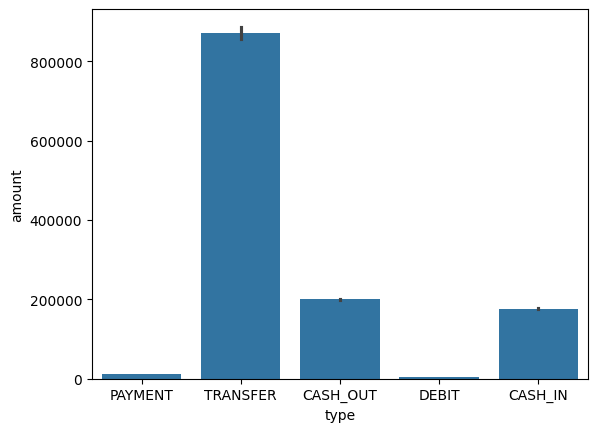

In [ ]:
sns.barplot(x="type" ,y="amount", data=df)

<Axes: xlabel='type', ylabel='oldbalanceOrg'>

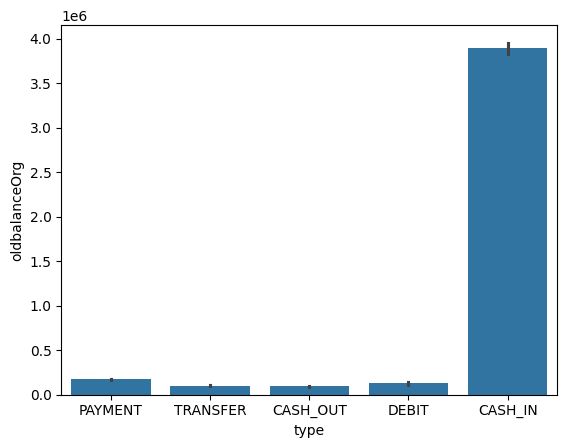

In [ ]:
sns.barplot(x="type" ,y="oldbalanceOrg", data=df)

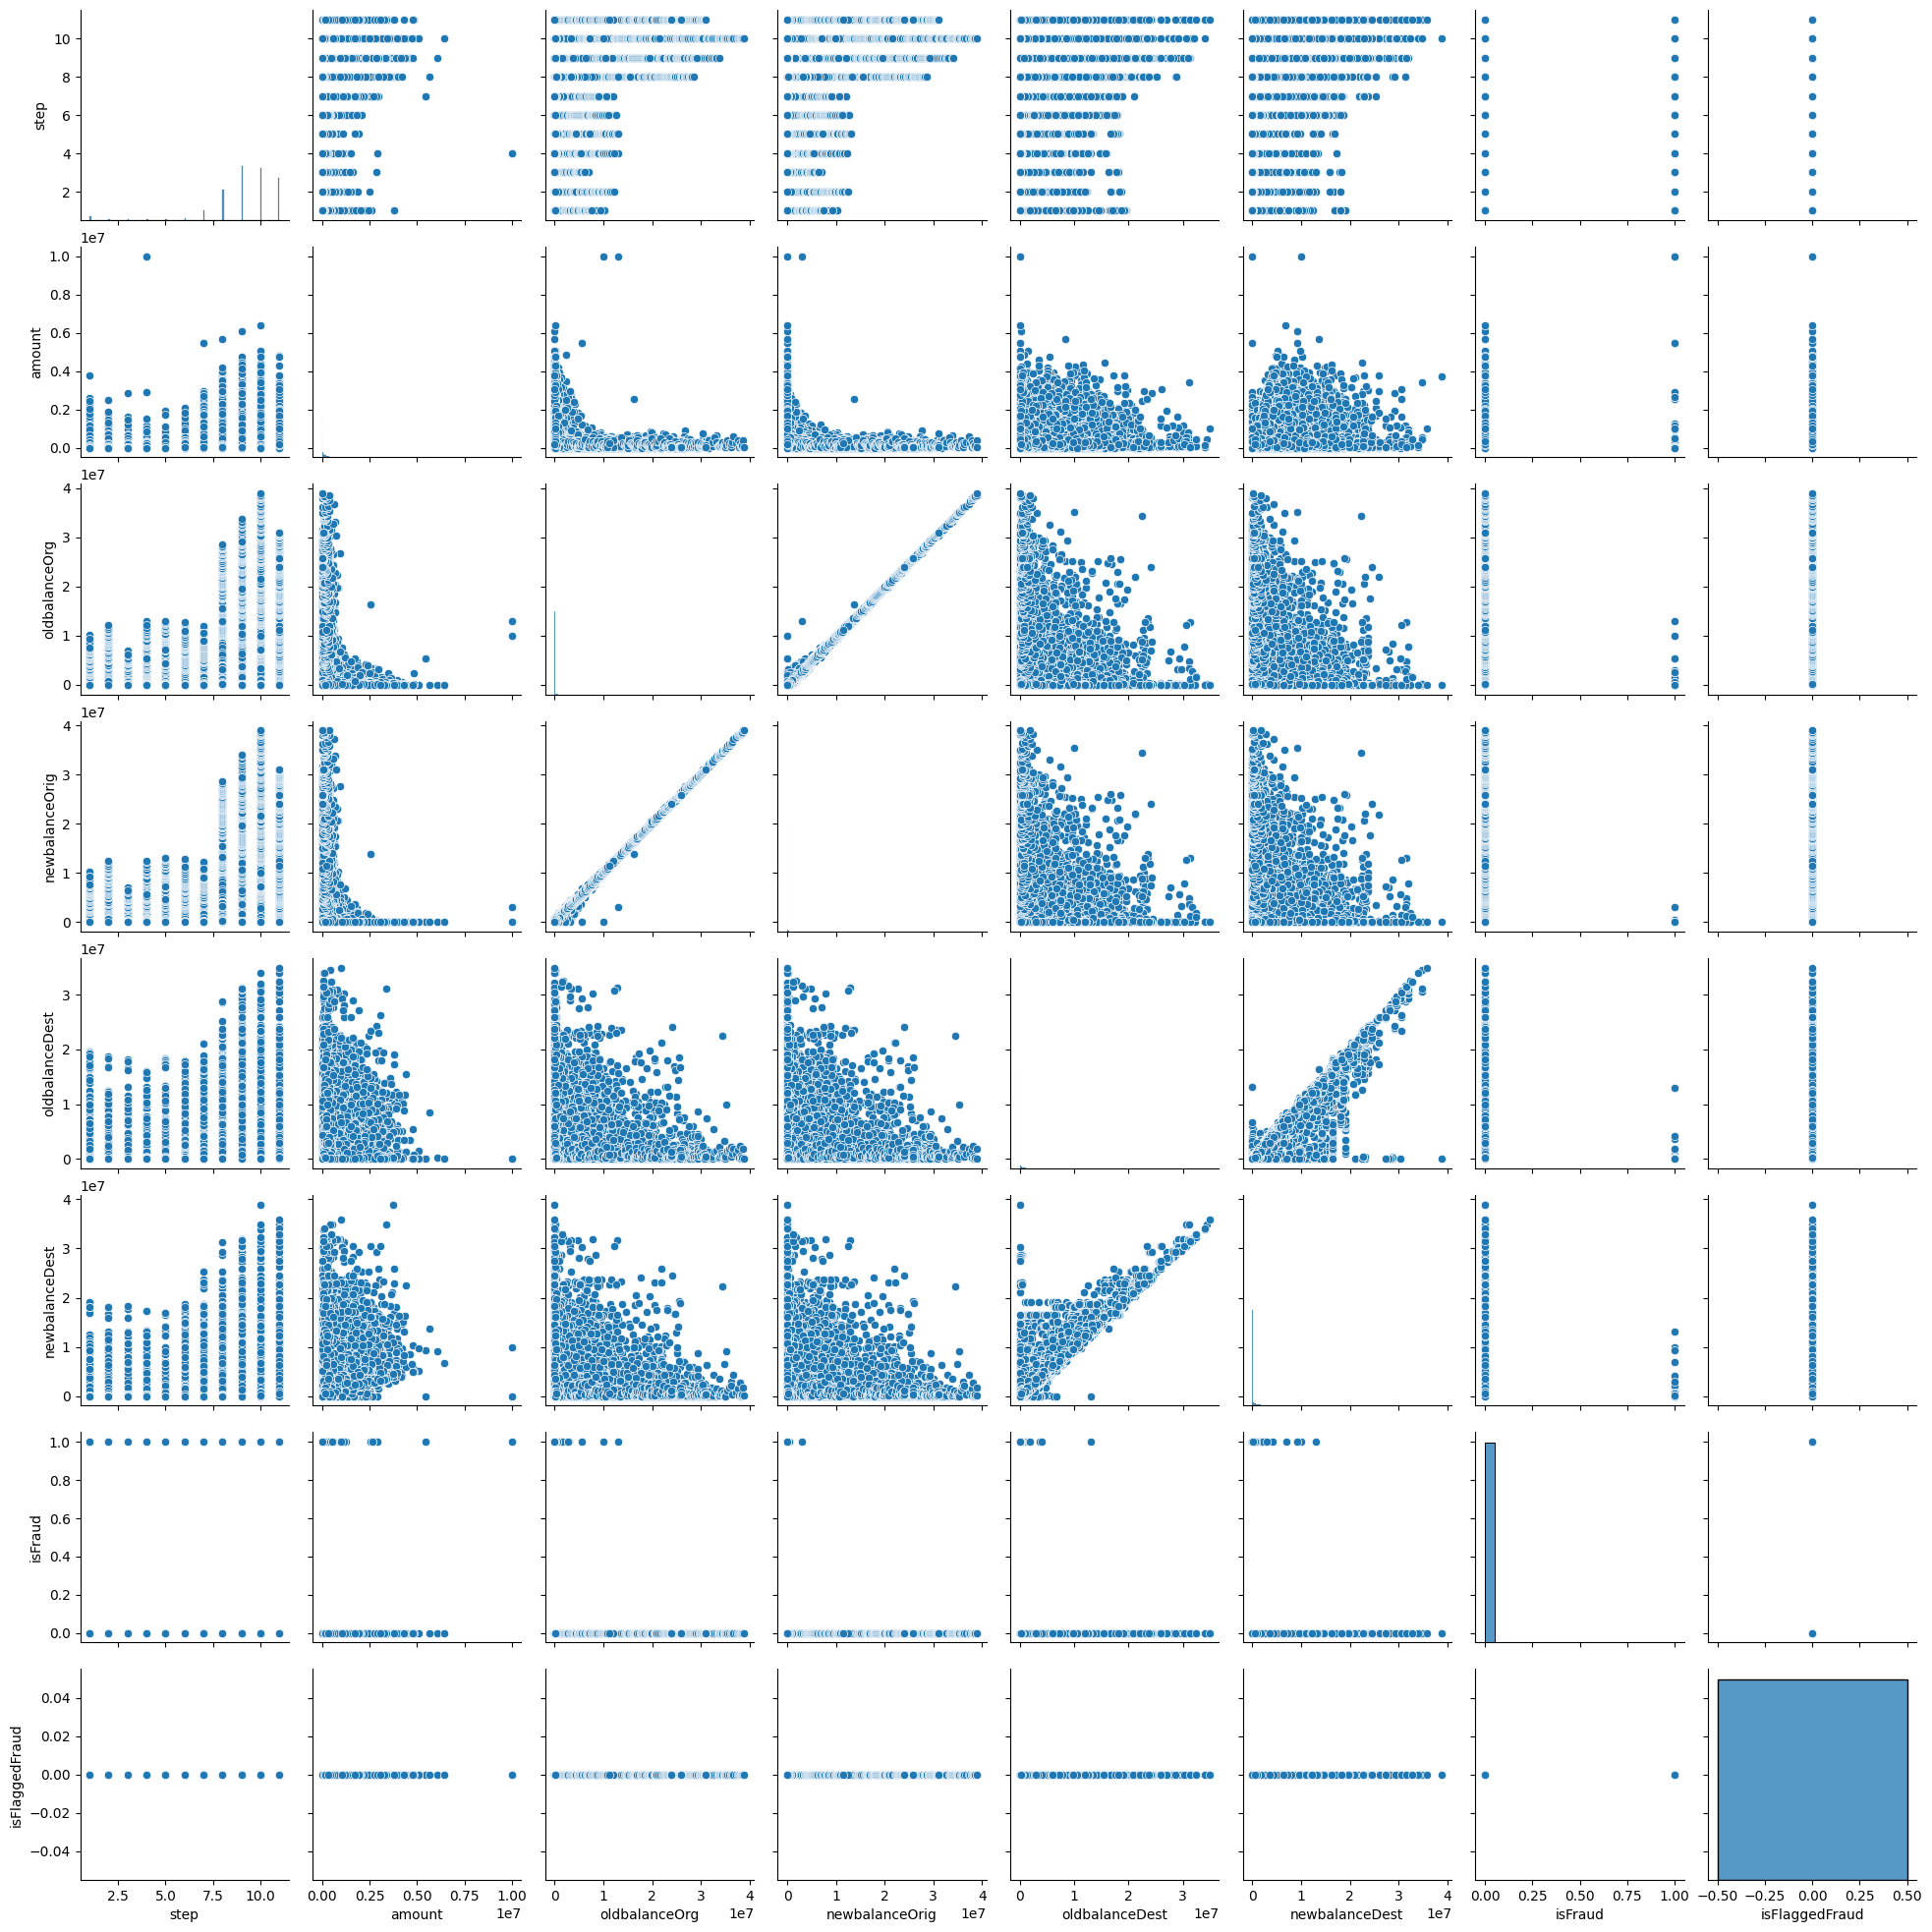

In [ ]:
sns.pairplot(df)

In [ ]:

df['oldbalanceOrg'] = pd.to_numeric(df['oldbalanceOrg'], errors='coerce')
# Fill NaN values in 'oldbalanceOrg' with its median
df['oldbalanceOrg'] = df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].median())

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df["newbalanceOrig"]=df["newbalanceOrig"].fillna(df["newbalanceOrig"].mean())

In [ ]:
df["nameDest"]=df["nameDest"].fillna(df["nameDest"].mode()[0])
df["oldbalanceDest"]=df["oldbalanceDest"].fillna(df["oldbalanceDest"].mean())
df["newbalanceDest"]=df["newbalanceDest"].fillna(df["newbalanceDest"].mean())
df["isFraud"]=df["isFraud"].fillna(df["isFraud"].mean())
df["isFlaggedFraud"]=df["isFlaggedFraud"].fillna(df["isFlaggedFraud"].mean())

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.sample()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
135370,11,PAYMENT,4360.5,C739065064,51780.0,47419.5,M1870471865,0.0,0.0,0.0,0.0


In [ ]:
# Numeric columns to check for outliers
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
138105,11,PAYMENT,4368.92,C1638950712,89681.00,85312.08,M278771256,0.00000,0.000000e+00,0.000000,0.0
138107,11,PAYMENT,1255.31,C2061341529,59864.00,58608.69,M126670412,0.00000,0.000000e+00,0.000000,0.0
138110,11,TRANSFER,436567.82,C353913447,12007.00,0.00,C947982595,58887.10000,4.954549e+05,0.000000,0.0
138113,11,CASH_OUT,168177.59,C850779719,261540.78,93363.19,C209813603,201463.66000,5.501709e+05,0.000000,0.0
138115,11,CASH_OUT,175087.49,C790956975,0.00,0.00,C1748,906954.82385,1.183330e+06,0.000883,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["type"]=lb.fit_transform(df["type"])

In [ ]:
df["nameOrig"]=lb.fit_transform(df["nameOrig"])
df["nameDest"]=lb.fit_transform(df["nameDest"])

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,3,1864.28,25670,21249.0,19384.72,34102,0.0,0.0,0.0,0.0
2,1,4,181.00,11671,181.0,0.00,9567,0.0,0.0,1.0,0.0
3,1,1,181.00,68796,181.0,0.00,8488,21182.0,0.0,1.0,0.0
4,1,3,11668.14,40490,41554.0,29885.86,17184,0.0,0.0,0.0,0.0
5,1,3,7817.71,71008,53860.0,46042.29,43719,0.0,0.0,0.0,0.0


In [ ]:
x=df.drop("isFraud",axis=1)
y=df["isFraud"].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
model.predict([[1,3,1864.28,503875,21249.0,19384.72,564310,0.0,0.0,0.0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9990661686232657

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm=confusion_matrix(y_test,y_pred)

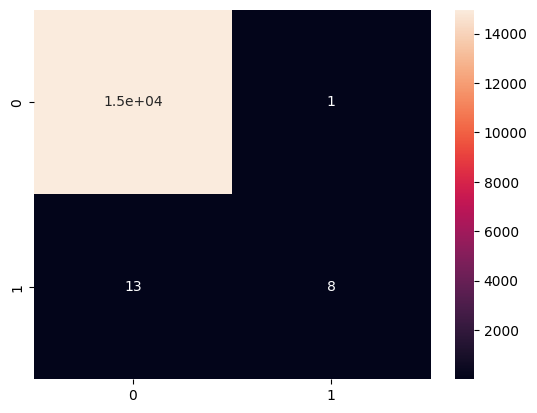

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


In [ ]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']

In [ ]:
import joblib
loaded_model = joblib.load("model.pkl")
